In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Standardization

from sklearn.model_selection import cross_validate
from sklearn.metrics import matthews_corrcoef, make_scorer

from sklearn.model_selection import KFold, cross_val_score



#Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, callbacks
from skimage.transform import resize, rescale
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization
from imutils import paths
from sklearn.metrics import classification_report
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping # Early Stopping Callback
from tensorflow.keras.optimizers import Adam # Optimizer
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Embedding
import visualkeras

In [2]:
data_df = pd.read_csv('Features_data_df.csv')


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Mean                         14400 non-null  float64
 1   Variance                     14400 non-null  float64
 2   Mode                         14400 non-null  float64
 3   Median                       14400 non-null  float64
 4   Skewness                     14400 non-null  float64
 5   Kurtosis                     14400 non-null  float64
 6   RMS                          14400 non-null  float64
 7   Line_Length                  14400 non-null  float64
 8   Entropy_MVN                  14400 non-null  float64
 9   Approximate_Entropy          14400 non-null  float64
 10  Sample_Entropy               158 non-null    float64
 11  Permutation entropy          14400 non-null  float64
 12  SVD_Entropy                  14400 non-null  float64
 13  LZ_Complexity   

In [4]:
data_df.drop('Sample_Entropy',axis=1,inplace=True)

In [5]:
data_df.isna().sum()

Mean                           0
Variance                       0
Mode                           0
Median                         0
Skewness                       0
Kurtosis                       0
RMS                            0
Line_Length                    0
Entropy_MVN                    0
Approximate_Entropy            0
Permutation entropy            0
SVD_Entropy                    0
LZ_Complexity                  0
Hjorth_Mobility                0
Hjorth_Complexity              0
DF_CPM                         0
DP                             0
P_PSD_G_DP                     0
Spectral_Entropy               0
BandPower_3-7                  0
BandPower_7-11                 0
BandPower_11-15                0
Crest_Factor_PSD               0
Median_Frequency               0
MPF                            0
Petrosian_Fractal_Dimension    0
Katz_Fractal_Dimension         0
MFCC1                          0
MFCC2                          0
MFCC3                          0
MFCC4     

In [6]:
data_df.dropna(axis=0,inplace=True)

In [7]:
data_df.isna().sum()

Mean                           0
Variance                       0
Mode                           0
Median                         0
Skewness                       0
Kurtosis                       0
RMS                            0
Line_Length                    0
Entropy_MVN                    0
Approximate_Entropy            0
Permutation entropy            0
SVD_Entropy                    0
LZ_Complexity                  0
Hjorth_Mobility                0
Hjorth_Complexity              0
DF_CPM                         0
DP                             0
P_PSD_G_DP                     0
Spectral_Entropy               0
BandPower_3-7                  0
BandPower_7-11                 0
BandPower_11-15                0
Crest_Factor_PSD               0
Median_Frequency               0
MPF                            0
Petrosian_Fractal_Dimension    0
Katz_Fractal_Dimension         0
MFCC1                          0
MFCC2                          0
MFCC3                          0
MFCC4     

In [8]:
data_df.shape

(14400, 35)

In [9]:
data_df.sample()

,Mean,Variance,Mode,Median,Skewness,Kurtosis,RMS,Line_Length,Entropy_MVN,Approximate_Entropy,...,Petrosian_Fractal_Dimension,Katz_Fractal_Dimension,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,state,channel,ID
11454,-0.025045,0.011291,-0.239867,-0.008571,-0.227775,-0.444365,0.109169,4.397792,-0.81,-0.033902,...,1.074009,2.910705,276.157959,5.763987,32.530884,6.723826,8.633434,postprandial,3.0,32.0


In [10]:
data_df.describe()

,Mean,Variance,Mode,Median,Skewness,Kurtosis,RMS,Line_Length,Entropy_MVN,Approximate_Entropy,...,MPF,Petrosian_Fractal_Dimension,Katz_Fractal_Dimension,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,channel,ID
count,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,...,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000
mean,-0.000035,0.091301,-0.376885,-0.000651,0.035510,2.150904,0.136518,5.194055,-1.045909,-0.032560,...,0.130689,1.068095,3.657960,252.650315,-0.713809,6.031400,2.612308,-0.714670,2.000000,20.500000
std,0.042212,0.522566,0.903567,0.019033,1.177904,4.662032,0.272857,9.249998,0.753991,0.007583,...,0.022811,0.008158,1.809802,75.098503,17.156360,13.207051,13.003777,12.654033,0.816525,11.543797
min,-0.475989,0.000383,-10.565470,-0.119632,-5.649380,-1.403664,0.019706,0.775557,-2.502000,-0.033902,...,0.055830,1.030056,1.240510,104.782906,-61.571312,-43.830551,-60.334450,-57.242733,1.000000,1.000000
25%,-0.008872,0.002524,-0.276144,-0.009707,-0.390950,-0.232170,0.050675,2.165606,-1.559000,-0.033902,...,0.115359,1.062442,2.621977,202.150467,-11.279201,-2.751169,-5.589005,-8.979659,1.000000,10.750000
50%,-0.000279,0.005707,-0.173361,-0.001060,0.016357,0.459040,0.077046,3.194689,-1.151000,-0.033902,...,0.129686,1.068975,3.287476,241.576172,-0.168334,5.710078,2.778280,-0.371246,2.000000,20.500000
75%,0.007768,0.014895,-0.110769,0.007782,0.440687,2.191844,0.123493,5.311827,-0.671750,-0.033902,...,0.145792,1.074009,4.217878,285.204918,10.841413,14.651643,11.142618,7.505551,3.000000,30.250000
max,0.543792,7.600026,-0.029374,0.208934,5.673135,31.504799,2.757167,95.831627,2.446000,0.157196,...,0.221616,1.093825,66.233772,592.348755,74.235588,54.961029,50.679832,57.825027,3.000000,40.000000


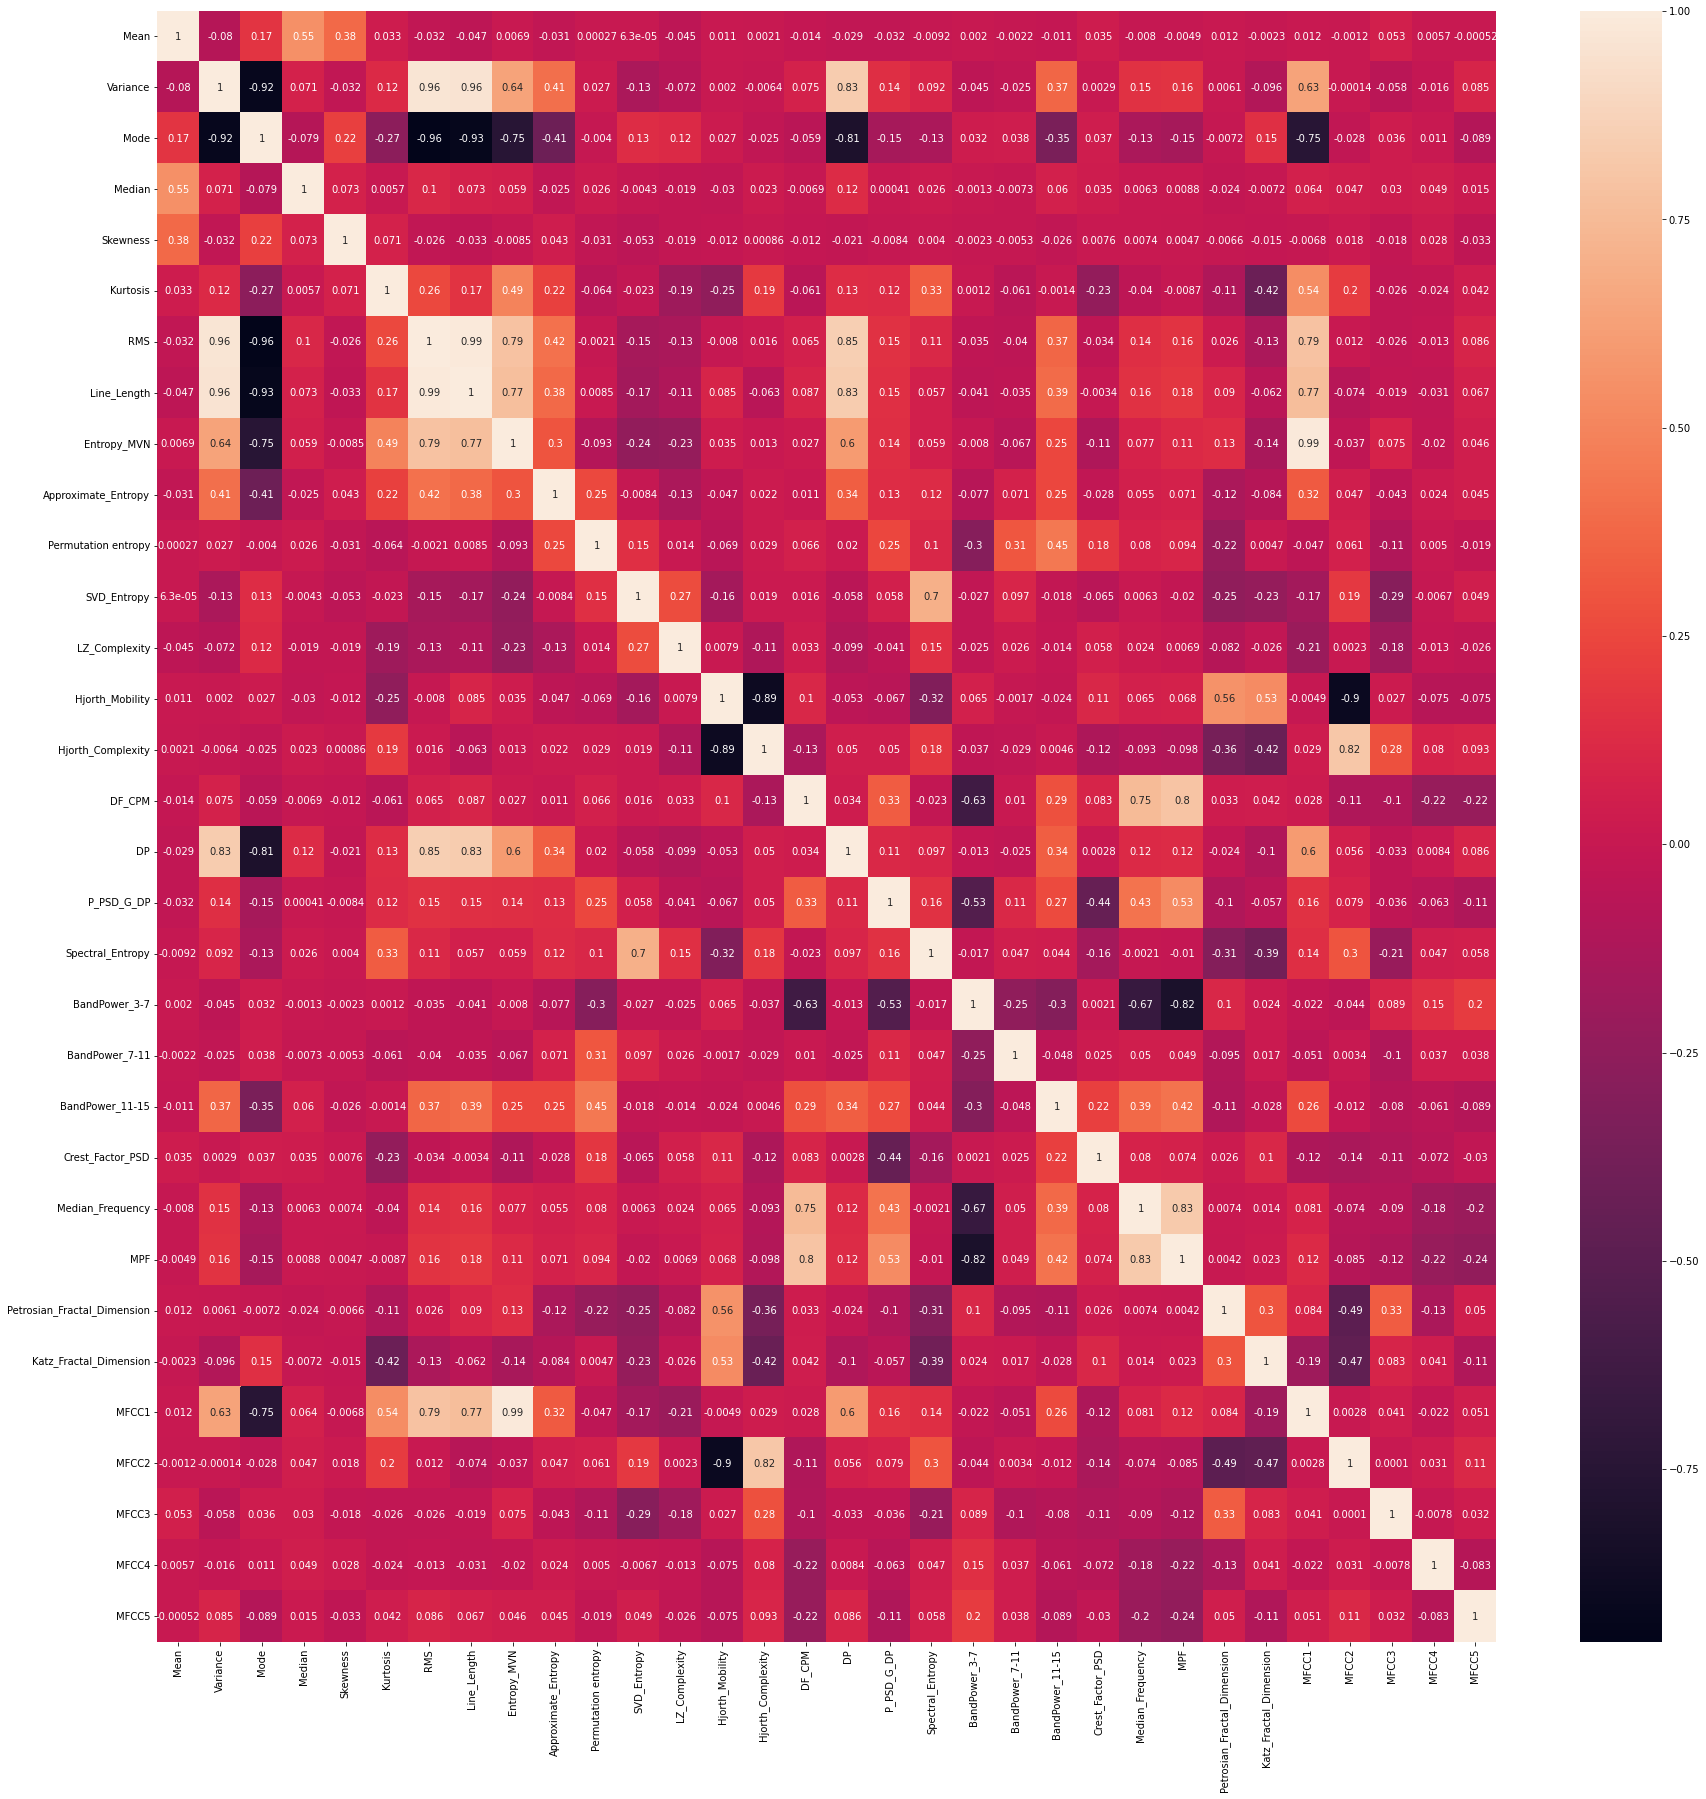

In [11]:
data_df_copy = data_df.drop(['state','channel','ID'],axis=1)
corrMatrix = data_df_copy.corr()
plt.figure(figsize=[30,30])
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [12]:
X= data_df.drop(['state','channel','ID'],axis=1)
y = data_df.state

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 69,stratify=y,shuffle=True)

In [13]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(11520, 32)
(11520,)
(2880, 32)
(2880,)


(None, None)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(11520, 32)
(2880, 32)


In [15]:
from sklearn.feature_selection import mutual_info_classif

In [16]:
X= data_df.drop(['state','channel','ID'],axis=1)
y = data_df.state
mi_score=mutual_info_classif(X,y)
mi_score=pd.Series(mi_score,index=X.columns)
mi_score=(mi_score*100).sort_values(ascending=False)
mi_score

Mode                           23.066976
Median                          9.803256
Petrosian_Fractal_Dimension     8.675238
Approximate_Entropy             7.810277
LZ_Complexity                   7.542800
DF_CPM                          7.302171
Permutation entropy             6.982839
Entropy_MVN                     6.881531
Median_Frequency                6.608294
Variance                        6.452605
RMS                             6.100856
MFCC1                           5.173915
Line_Length                     4.266940
DP                              3.411409
Spectral_Entropy                2.623827
P_PSD_G_DP                      2.195177
BandPower_7-11                  2.107545
SVD_Entropy                     1.913930
Kurtosis                        1.718360
Skewness                        1.506477
BandPower_3-7                   1.295631
Mean                            1.193982
MFCC4                           1.076540
MFCC3                           0.911780
MFCC5           

In [17]:
mi_score.head(28).index

Index(['Mode', 'Median', 'Petrosian_Fractal_Dimension', 'Approximate_Entropy',
       'LZ_Complexity', 'DF_CPM', 'Permutation entropy', 'Entropy_MVN',
       'Median_Frequency', 'Variance', 'RMS', 'MFCC1', 'Line_Length', 'DP',
       'Spectral_Entropy', 'P_PSD_G_DP', 'BandPower_7-11', 'SVD_Entropy',
       'Kurtosis', 'Skewness', 'BandPower_3-7', 'Mean', 'MFCC4', 'MFCC3',
       'MFCC5', 'Katz_Fractal_Dimension', 'MPF', 'MFCC2'],
      dtype='object')

In [18]:
top_features = data_df[['Mode', 'Median', 'Petrosian_Fractal_Dimension', 'Approximate_Entropy',
       'LZ_Complexity', 'Permutation entropy', 'Median_Frequency', 'DF_CPM',
       'Variance', 'Entropy_MVN', 'RMS', 'MFCC1', 'Line_Length', 'DP',
       'P_PSD_G_DP', 'Spectral_Entropy', 'BandPower_7-11', 'SVD_Entropy',
       'Kurtosis', 'Skewness', 'BandPower_3-7', 'Mean', 'MFCC4', 'MFCC3',
       'MFCC5', 'Katz_Fractal_Dimension', 'MPF', 'MFCC2']]

In [19]:
X= top_features
y = pd.get_dummies(data_df.state)

X_train, X_rem, y_train, y_rem = train_test_split(X,
                                                  y,
                                                  train_size=0.8,
                                                  random_state=42,
                                                  stratify=y,
                                                  shuffle=True)

test_size = 0.2
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,
                                                    y_rem,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y_rem,
                                                    shuffle=True)

print(f'Training samples shape = {X_train.shape}'), print(f'Training labels shape ={ y_train.shape}')
print(f'Validation samples shape = {X_valid.shape}'), print(f'Validation labels shape = {y_valid.shape}')
print(f'Testing samples shape = {X_test.shape}'), print(f'Testing labels shape = {y_test.shape}')

Training samples shape = (11520, 28)
Training labels shape =(11520, 2)
Validation samples shape = (2304, 28)
Validation labels shape = (2304, 2)
Testing samples shape = (576, 28)
Testing labels shape = (576, 2)


(None, None)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(11520, 28)
(2304, 28)
(576, 28)


In [ ]:
model = load_model('EGG_MODEL_LATEST.h5')

In [24]:
test_scores = model.evaluate(X_test, y_test, verbose=0)
validation_scores = model.evaluate(X_valid, y_valid, verbose=0)
train_scores = model.evaluate(X_train, y_train, verbose=0)
print(f"Train scores: {model.metrics_names[0]}: {train_scores[0]} , {model.metrics_names[1]}: {train_scores[1]}")
print(f"Validation scores: {model.metrics_names[0]}: {validation_scores[0]} , {model.metrics_names[1]}: {validation_scores[1]}")
print(f"Test scores: {model.metrics_names[0]}: {test_scores[0]} , {model.metrics_names[1]}: {test_scores[1]}")

Train scores: loss: 0.0019104593666270375 , accuracy: 1.0
Validation scores: loss: 0.14715637266635895 , accuracy: 0.9505208134651184
Test scores: loss: 0.16820795834064484 , accuracy: 0.9496527910232544


In [25]:
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
#yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array

yhat_classes = np.argmax(yhat_probs, axis=1)
yhat_probs_c = yhat_probs[:, 0]


In [26]:
y_test_adjusted = np.argmax(np.array(y_test), axis=1)

In [27]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_adjusted, yhat_classes)
print(f'Accuracy: {accuracy}')
# precision tp / (tp + fp)
precision = precision_score(y_test_adjusted, yhat_classes)
print(f'Precision: {precision}')
# recall: tp / (tp + fn)
recall = recall_score(y_test_adjusted, yhat_classes)
print(f'Recall: {recall}')
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_adjusted, yhat_classes)
print(f'F1 score: {f1}')
# ROC AUC
auc = roc_auc_score(y_test_adjusted, yhat_probs_c)
print(f'ROC AUC: {auc}')
# confusion matrix
matrix = confusion_matrix(y_test_adjusted, yhat_classes)
print(matrix)

Accuracy: 0.9496527777777778
Precision: 0.9480968858131488
Recall: 0.9513888888888888
F1 score: 0.9497400346620452
ROC AUC: 0.013973283179012343
[[273  15]
 [ 14 274]]


In [28]:
print(classification_report(y_test_adjusted,yhat_classes))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       288
           1       0.95      0.95      0.95       288

    accuracy                           0.95       576
   macro avg       0.95      0.95      0.95       576
weighted avg       0.95      0.95      0.95       576



In [29]:
for layer in model.layers:
        print("Layer Name: " + layer.name)
        print("Type of layer: " + layer.__class__.__name__)
        print("Input dimesion: {}".format(layer.input_shape[1:]))
        print("Output dimesion: {}".format(layer.output_shape[1:]))
        print("Parameter Count: {}".format( layer.count_params()))
        try:
            print("Activation : " + layer.activation.__name__)
            print(" ")
        except:
            print(" ")

Layer Name: dense
Type of layer: Dense
Input dimesion: (28,)
Output dimesion: (64,)
Parameter Count: 1856
Activation : relu
 
Layer Name: batch_normalization
Type of layer: BatchNormalization
Input dimesion: (64,)
Output dimesion: (64,)
Parameter Count: 256
 
Layer Name: dropout
Type of layer: Dropout
Input dimesion: (64,)
Output dimesion: (64,)
Parameter Count: 0
 
Layer Name: dense_1
Type of layer: Dense
Input dimesion: (64,)
Output dimesion: (124,)
Parameter Count: 8060
Activation : relu
 
Layer Name: batch_normalization_1
Type of layer: BatchNormalization
Input dimesion: (124,)
Output dimesion: (124,)
Parameter Count: 496
 
Layer Name: dropout_1
Type of layer: Dropout
Input dimesion: (124,)
Output dimesion: (124,)
Parameter Count: 0
 
Layer Name: dense_2
Type of layer: Dense
Input dimesion: (124,)
Output dimesion: (248,)
Parameter Count: 31000
Activation : relu
 
Layer Name: batch_normalization_2
Type of layer: BatchNormalization
Input dimesion: (248,)
Output dimesion: (248,)
Param

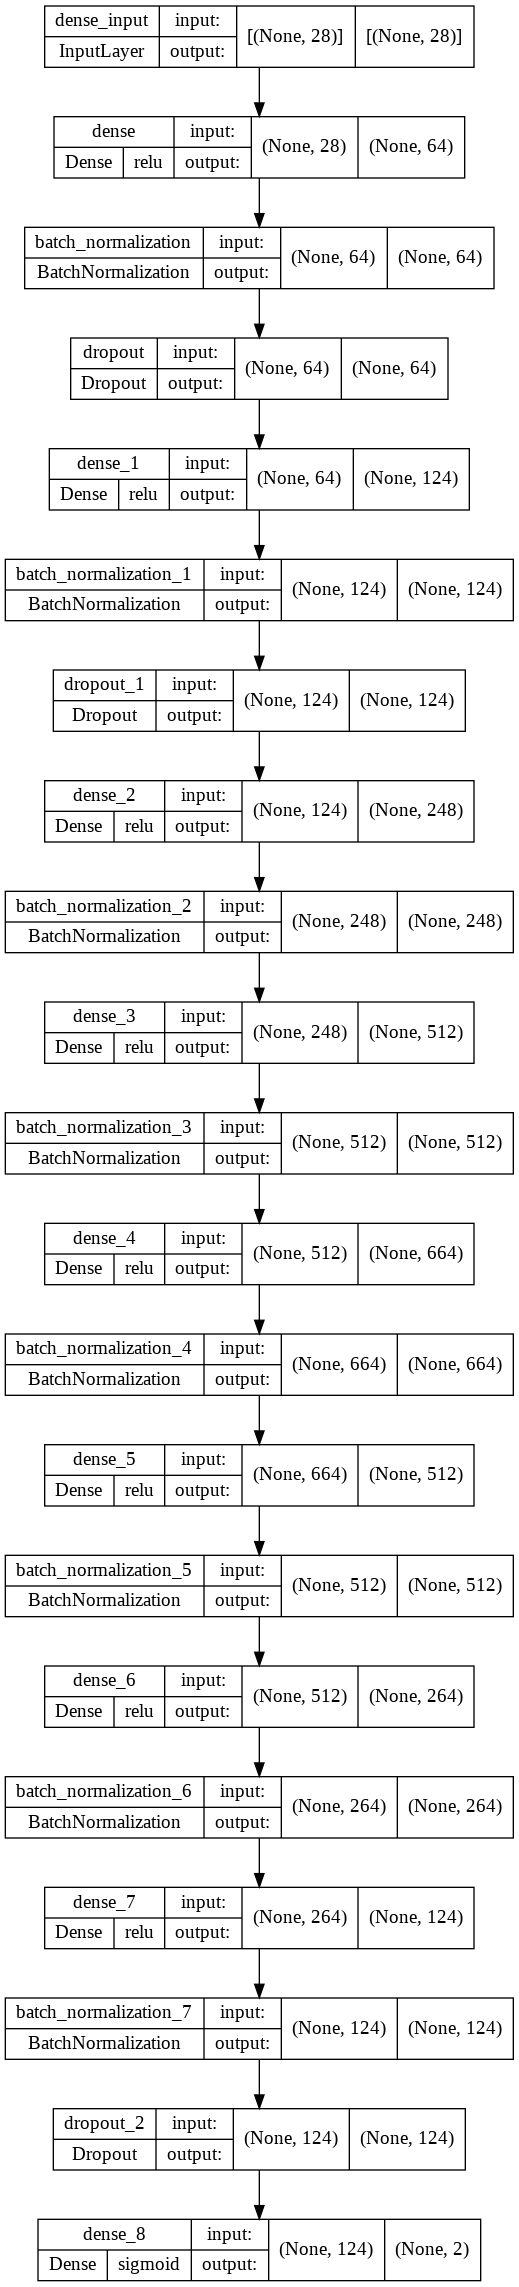

In [38]:
keras.utils.plot_model(
    model,
    to_file="EGG_model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)

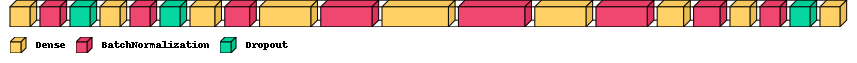

In [33]:
visualkeras.layered_view(model,legend=True, draw_volume=True)